In [105]:
#############
###paths#####
#############
import sys
import os

pwd = os.getcwd()
modellingpath = pwd.rpartition("modelling")[0] + pwd.rpartition("modelling")[1] 
modellingephemeral = '/rds/general/ephemeral/user/mo2016/ephemeral/Documents/modelling'
sys.path.append(modellingpath + '/lib')
#############
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns


In [109]:
#fit 
pfitDict = {'Vc': 99.99999998437673,
 'Vd': 8.845204237579598,
 'Ve': 99.99999902098732,
 'Vf': 8.394996554940189,
 'Kvd': 0.9400832873750722,
 'Kda': 4.142114110177617,
 'Kce': 4.342277899710668,
 'Kfe': 0.4319218458202641}
pfit =np.array(list(pfitDict.values()),dtype=np.float64)

#turing dist
circuit_n=14;variant='2nd';n_species=6;nsamples=1000000
folder = 'circuit14variant2ndBalancedTuring'
with open(modellingpath + '/3954/paper/out/analytical/lsa_dataframes/turing_dataframes/turing_df_circuit%s_variant%s_%sparametersets_balanced.pkl'%(circuit_n,variant,nsamples), "rb" ) as f:
   turingDf = pkl.load(f)


circuit_n='circuit14'
variant='2nd'
n_species=6
n_param_sets = 1000000
balance = 'balanced'
df= pkl.load( open(modellingpath + "/3954/paper/input/balanced_parameterfiles/df_%s_variant%s_%rparametersets_%s.pkl"%(circuit_n,variant,n_param_sets, balance), "rb"))

pfitDict.keys()
turingDf = turingDf[pfitDict.keys()]
#add fit to Turing df
turingDf.loc['fit'] = pfit


turingNp = turingDf.to_numpy(dtype=np.float64)
#add fit to Turing df

turingNp

turingDf

FileNotFoundError: [Errno 2] No such file or directory: '/Users/mo2016/Documents/modelling/3954/paper/input/balanced_parameterfiles/df_circuit14_variant2nd_1000000parametersets_balanced.pkl'

## Mahanohabis distance 

[389.84872529 281.33679725 106.70254044  91.26050492  17.46997511
   1.18936236 123.89592471   1.72054453]
(8, 8)


<AxesSubplot: ylabel='Count'>

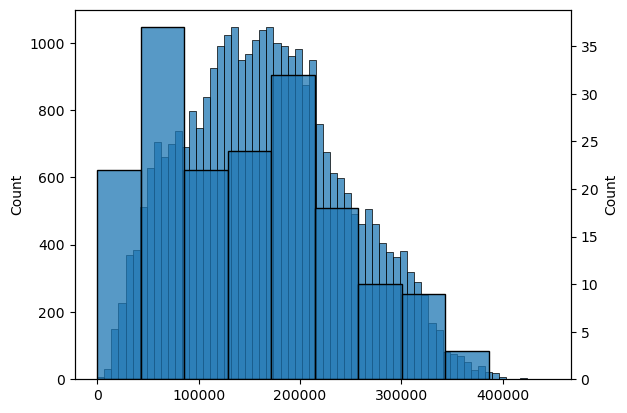

In [107]:
#calculate mahanohabis distance for each parameter set to fit
from scipy.spatial.distance import mahalanobis
print(turingNp[0])
#calculate covariance matrix
# cov = turingDf[pfitDict.keys()].cov()
cov = np.cov(turingNp.T)
print(cov.shape)
mahalanobisTuring = []
for n1 in range(len(turingDf)):
    for n2 in range(len(turingDf)):
        if n1!=n2:
            mahalanobisTuring.append(mahalanobis(turingNp[n1], turingNp[n2], VI=cov))
mahalanobisFit = []
for n in range(len(turingDf)):
    mahalanobisFit.append(mahalanobis(turingNp[n], pfit, VI=cov))


fig, ax = plt.subplots()
sns.histplot(mahalanobisTuring, ax=ax)
ax2 = ax.twinx()
sns.histplot(mahalanobisFit, ax=ax2)
#     mahalanobisTuring.append()
# print(mahalanobis(turingNp[0], pfit, VI=cov))
# print(mahalanobis(turingNp[1], pfit, VI=cov))
# print(mahalanobis(pfit, pfit, VI=cov))
# print(mahalanobis(turingNp[1], turingNp[2], VI=cov))


## tsne 

/Users/mo2016/opt/anaconda3/envs/condaenv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/mo2016/opt/anaconda3/envs/condaenv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 177 samples in 0.000s...
[t-SNE] Computed neighbors for 177 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 177 / 177
[t-SNE] Mean sigma: 207.443514
[t-SNE] KL divergence after 250 iterations with early exaggeration: 105.923080
[t-SNE] KL divergence after 300 iterations: 2.498869


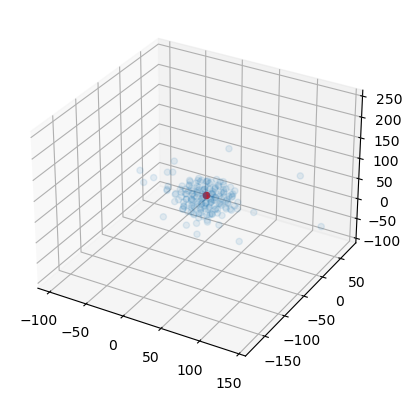

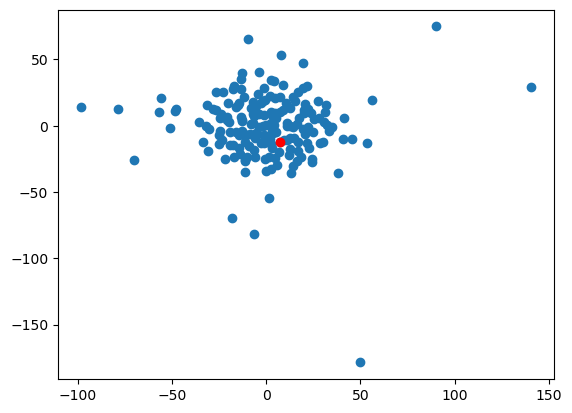

In [108]:
#plot tsne of turing and fit
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(turingNp)
#3d plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_results[:,0],tsne_results[:,1],tsne_results[:,2], alpha=0.1)
ax.scatter(tsne_results[-1,0],tsne_results[-1,1],tsne_results[-1,2],color='red')
plt.show()
#2d plot

fig, ax = plt.subplots()
plt.scatter(tsne_results[:,0],tsne_results[:,1])
plt.scatter(tsne_results[-1,0],tsne_results[-1,1],color='red')
plt.show()